In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import subprocess
import shlex
# My module
import gen_rand

print("START")

START


In [2]:
!sh comp.sh;

In [3]:
Obj1 = gen_rand.Rand_set(3, 1001, 1)
rand_arr = Obj1.gen_rand_prnt(ret=1)
del(Obj1)
rand_arr.shape

(998,)

In [4]:
!rm -f size_dup.txt;
!echo "Len Dup" >> size_dup.txt;

from fileinput import close


with open('size_dup.txt', "a") as outfile:
    for i in rand_arr:
        t = np.array2string(np.array(list(i)))[1:-1]
        t = "./bi_tree_bin " + t
        t = shlex.split(t)
        subprocess.run(t, stdout=outfile)

outfile.close()
del(outfile)
del(rand_arr)
del(t)

!wc -l size_dup.txt;

     999 size_dup.txt


In [5]:
dDup = pd.read_table("size_dup.txt", delimiter=" ", index_col=False)
dDup.tail(5)

,Len,Dup
993,996,26
994,997,25
995,998,24
996,999,23
997,1000,22


<AxesSubplot:xlabel='Len'>

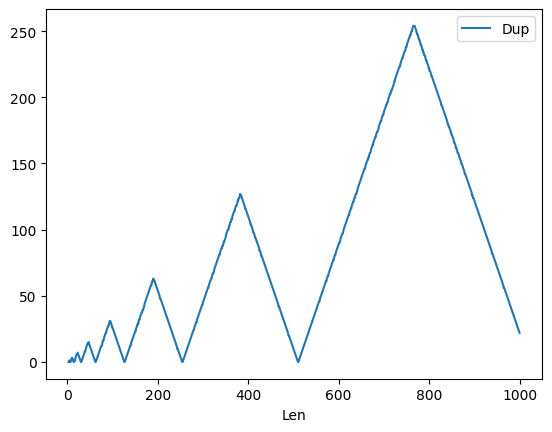

In [6]:
dDup.plot(x='Len', y='Dup')